### Removing Outliers

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('./all_data3.xlsx')
df2 = df[['bedrooms', 'bathrooms', 'sqft']]

In [51]:
filtered_df = df[(df['bedrooms'] <= 3) & (df['bedrooms'] >= 1) & (df['bathrooms'] <= 2) & (df['bathrooms'] >= 1)]

In [52]:
filtered_df.head(2)

,zpid,city,state,zipcode,bedrooms,bathrooms,sqft,vacant for rent,median age,currently married,crime rate,pop dens zipcode,income household median,cost of living score,price,link.1,people_stats_link
1,2115157686,Bronx,NY,10468,1.0,1.0,NaN,0.013,34.4,0.331,63.7,66519.9,40138.0,141.0,1750,https://www.zillow.com/homedetails/2701-Grand-...,https://www.bestplaces.net/people/zip-code/new...
2,359662552,Bronx,NY,10461,1.0,1.0,NaN,0.023,33.9,0.432,13.9,21850.8,61087.0,141.0,2584,https://www.zillow.com/homedetails/Bronx-NY-10...,https://www.bestplaces.net/people/zip-code/new...


In [53]:
len(filtered_df)

6767

In [54]:
cleaned_df = filtered_df.dropna()
len(cleaned_df)

2300

In [55]:
cleaned_df.describe()

,zpid,zipcode,bedrooms,bathrooms,sqft,vacant for rent,median age,currently married,crime rate,pop dens zipcode,income household median,cost of living score,price
count,2.300000e+03,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000
mean,1.108574e+09,10823.873913,1.921739,1.252826,1038.080435,0.022657,38.796174,0.403490,40.115217,45896.953217,79978.610000,167.509304,3689.038261
std,9.119146e+08,540.366770,0.790855,0.419579,678.794395,0.012885,6.942062,0.096965,17.434196,29632.912295,33422.142695,20.727292,2613.232373
min,2.977812e+07,10001.000000,1.000000,1.000000,10.000000,0.000000,26.200000,0.207000,13.600000,1261.200000,21846.000000,141.000000,1000.000000
25%,3.498026e+08,10314.000000,1.000000,1.000000,750.000000,0.013000,34.600000,0.327000,24.900000,22559.500000,58146.500000,157.900000,2448.250000
50%,3.537417e+08,11106.000000,2.000000,1.000000,950.000000,0.020000,37.700000,0.394000,39.000000,39908.000000,76721.000000,158.400000,3000.000000
75%,2.078877e+09,11235.000000,3.000000,1.500000,1150.000000,0.031000,41.200000,0.494000,56.950000,65936.500000,95999.000000,172.500000,3853.000000
max,2.146837e+09,11694.000000,3.000000,2.000000,20000.000000,0.078000,86.000000,0.600000,68.400000,146955.300000,250001.000000,204.100000,44000.000000


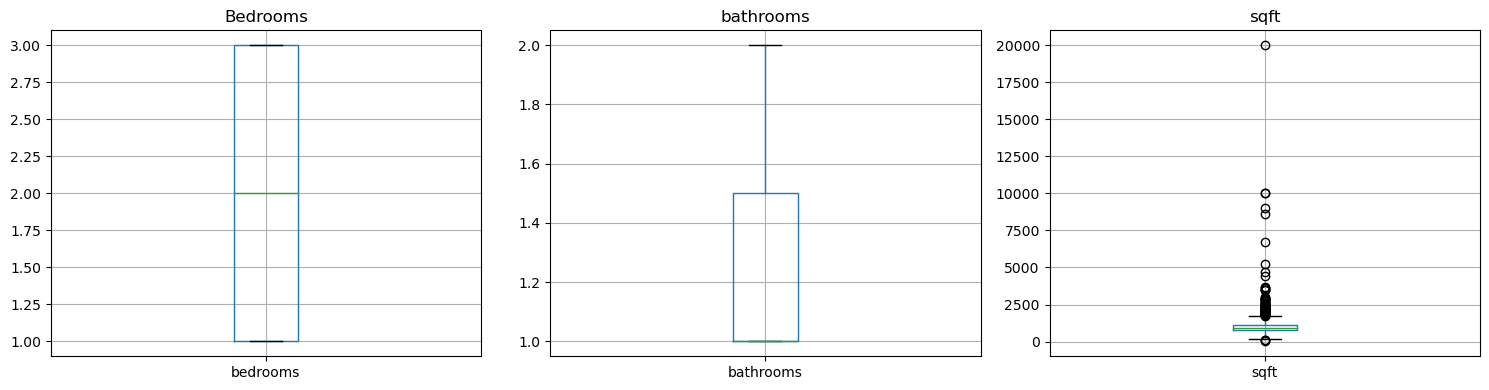

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

cleaned_df.boxplot(column=['bedrooms'], ax=axes[0])
axes[0].set_title('Bedrooms')

cleaned_df.boxplot(column=['bathrooms'], ax=axes[1])
axes[1].set_title('bathrooms')

cleaned_df.boxplot(column=['sqft'], ax=axes[2])
axes[2].set_title('sqft')

plt.tight_layout()
plt.show()

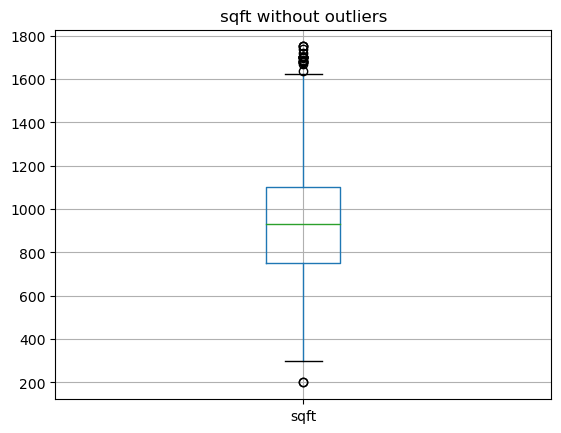

In [76]:
# delete outliers of sqft
Q1 = cleaned_df['sqft'].quantile(0.25)
Q3 = cleaned_df['sqft'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

filtered_df2 = cleaned_df[(cleaned_df['sqft'] >= lower_limit) & (cleaned_df['sqft'] <= upper_limit)]

filtered_df2.boxplot(column=['sqft'])
plt.title('sqft without outliers')
plt.show()

In [77]:
house_1b1b = filtered_df2[(filtered_df2['bedrooms'] == 1) &  (filtered_df2['bathrooms'] == 1)]
house_1b1b.describe()

,zpid,zipcode,bedrooms,bathrooms,sqft,vacant for rent,median age,currently married,crime rate,pop dens zipcode,income household median,cost of living score,price
count,7.600000e+02,760.000000,760.0,760.0,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.00000,760.000000
mean,1.139236e+09,10780.185526,1.0,1.0,768.343421,0.022576,38.476974,0.398578,39.329868,51303.294079,79664.596053,166.81500,2787.944737
std,9.193991e+08,532.984891,0.0,0.0,193.134110,0.012967,7.326060,0.097811,18.016545,30844.238923,35799.945146,21.95046,1268.842689
min,2.977812e+07,10001.000000,1.0,1.0,200.000000,0.000000,26.200000,0.207000,13.600000,4937.600000,21846.000000,141.00000,1000.000000
25%,3.487807e+08,10314.000000,1.0,1.0,650.000000,0.013000,34.200000,0.312000,24.900000,27333.925000,52273.000000,157.90000,1950.000000
50%,3.542592e+08,11101.000000,1.0,1.0,750.000000,0.020000,37.200000,0.391000,38.700000,44728.900000,73744.500000,157.90000,2397.000000
75%,2.082387e+09,11233.250000,1.0,1.0,850.000000,0.029000,41.200000,0.484750,60.300000,72357.300000,96332.750000,172.50000,3112.500000
max,2.146837e+09,11694.000000,1.0,1.0,1750.000000,0.078000,86.000000,0.590000,68.400000,146955.300000,250001.000000,204.10000,11500.000000


In [78]:
house_1b1_5b = filtered_df2[(filtered_df2['bedrooms'] == 1) &  (filtered_df2['bathrooms'] == 1.5)]
house_1b1_5b.describe()

,zpid,zipcode,bedrooms,bathrooms,sqft,vacant for rent,median age,currently married,crime rate,pop dens zipcode,income household median,cost of living score,price
count,2.500000e+01,25.000000,25.0,25.0,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1.204068e+09,10580.840000,1.0,1.5,954.400000,0.028640,37.660000,0.397800,53.476000,61608.132000,117118.480000,187.088000,5611.360000
std,9.577804e+08,602.483726,0.0,0.0,213.050855,0.013294,4.095831,0.073318,13.440092,32402.708196,32116.899684,19.220699,2432.826286
min,3.153105e+07,10011.000000,1.0,1.5,600.000000,0.008000,31.700000,0.247000,28.200000,11415.900000,52380.000000,141.000000,1900.000000
25%,3.384357e+08,10017.000000,1.0,1.5,809.000000,0.022000,34.500000,0.331000,43.700000,39596.100000,86185.000000,172.500000,4000.000000
50%,2.059928e+09,10128.000000,1.0,1.5,920.000000,0.028000,36.700000,0.433000,61.300000,50847.000000,136109.000000,204.100000,5400.000000
75%,2.101473e+09,11221.000000,1.0,1.5,1066.000000,0.035000,40.700000,0.451000,63.400000,82215.900000,139343.000000,204.100000,7500.000000
max,2.140833e+09,11415.000000,1.0,1.5,1447.000000,0.063000,46.200000,0.548000,68.400000,132677.400000,152335.000000,204.100000,10000.000000


In [79]:
house_1b2b = filtered_df2[(filtered_df2['bedrooms'] == 1) &  (filtered_df2['bathrooms'] == 2)]
house_1b2b.describe()

,zpid,zipcode,bedrooms,bathrooms,sqft,vacant for rent,median age,currently married,crime rate,pop dens zipcode,income household median,cost of living score,price
count,1.000000e+01,10.000000,10.0,10.0,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000
mean,7.815236e+08,10509.300000,1.0,2.0,1015.600000,0.030300,40.730000,0.353800,48.53000,65569.960000,94837.300000,190.000000,5877.000000
std,9.073572e+08,646.759624,0.0,0.0,367.972885,0.010924,5.975887,0.101901,15.35412,19484.338244,42985.557815,18.684575,3028.542187
min,3.152776e+07,10001.000000,1.0,2.0,500.000000,0.013000,32.000000,0.247000,28.40000,36638.700000,37093.000000,157.900000,2100.000000
25%,1.582593e+08,10004.750000,1.0,2.0,712.500000,0.026250,35.925000,0.278250,37.10000,51985.450000,66161.750000,172.500000,3387.500000
50%,3.511855e+08,10019.500000,1.0,2.0,1050.000000,0.031000,39.900000,0.329500,46.55000,64001.750000,84975.500000,204.100000,5550.000000
75%,1.635729e+09,11224.000000,1.0,2.0,1232.750000,0.034750,45.875000,0.396500,61.95000,75968.025000,134992.750000,204.100000,8562.500000
max,2.099548e+09,11355.000000,1.0,2.0,1700.000000,0.051000,49.300000,0.549000,68.40000,98998.800000,156255.000000,204.100000,10700.000000


In [80]:
house_2b1b = filtered_df2[(filtered_df2['bedrooms'] == 2) &  (filtered_df2['bathrooms'] == 1)]
house_2b1b.describe()

,zpid,zipcode,bedrooms,bathrooms,sqft,vacant for rent,median age,currently married,crime rate,pop dens zipcode,income household median,cost of living score,price
count,5.670000e+02,567.000000,567.0,567.0,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,1.203641e+09,10866.481481,2.0,1.0,908.246914,0.021979,38.484303,0.402917,39.790476,44376.339506,75392.832451,165.599471,3047.259259
std,9.042315e+08,522.604972,0.0,0.0,193.356531,0.011334,5.888656,0.096270,17.335296,29315.051607,29164.447234,19.216417,1097.952911
min,2.977930e+07,10002.000000,2.0,1.0,400.000000,0.000000,26.200000,0.207000,13.600000,1261.200000,21846.000000,141.000000,1488.000000
25%,3.516870e+08,10455.000000,2.0,1.0,800.000000,0.013000,34.900000,0.323000,24.900000,21850.800000,56052.500000,157.900000,2400.000000
50%,2.053265e+09,11205.000000,2.0,1.0,900.000000,0.020000,37.200000,0.398000,38.800000,36953.700000,73279.000000,158.400000,2762.000000
75%,2.079706e+09,11237.500000,2.0,1.0,1000.000000,0.029000,41.200000,0.494500,54.300000,59821.250000,89091.000000,172.500000,3200.000000
max,2.144263e+09,11694.000000,2.0,1.0,1680.000000,0.078000,86.000000,0.600000,68.400000,146955.300000,216017.000000,204.100000,10150.000000


In [81]:
house_2b1_5b = filtered_df2[(filtered_df2['bedrooms'] == 2) &  (filtered_df2['bathrooms'] == 1.5)]
house_2b1_5b.describe()

,zpid,zipcode,bedrooms,bathrooms,sqft,vacant for rent,median age,currently married,crime rate,pop dens zipcode,income household median,cost of living score,price
count,2.700000e+01,27.000000,27.0,27.0,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,7.284105e+08,10971.111111,2.0,1.5,1105.074074,0.018333,38.225926,0.430556,38.837037,40926.955556,82451.481481,168.762963,3787.851852
std,8.300446e+08,475.407868,0.0,0.0,251.446879,0.010209,4.563534,0.101335,17.191191,26749.053977,29366.186943,16.477004,1329.226053
min,3.060010e+07,10022.000000,2.0,1.5,686.000000,0.006000,29.500000,0.247000,15.300000,6095.500000,46963.000000,141.000000,2300.000000
25%,2.964449e+08,10468.000000,2.0,1.5,1000.000000,0.011000,34.900000,0.345500,28.450000,19862.700000,58759.500000,157.900000,2753.500000
50%,3.520645e+08,11214.000000,2.0,1.5,1065.000000,0.014000,37.700000,0.466000,38.800000,40359.900000,80245.000000,172.500000,3500.000000
75%,1.207128e+09,11233.000000,2.0,1.5,1231.000000,0.025500,40.600000,0.512000,53.900000,51663.600000,91834.500000,172.500000,4422.500000
max,2.115582e+09,11421.000000,2.0,1.5,1667.000000,0.037000,49.300000,0.565000,68.300000,132677.400000,156255.000000,204.100000,7000.000000


In [82]:
house_2b2b = filtered_df2[(filtered_df2['bedrooms'] == 2) &  (filtered_df2['bathrooms'] == 2)]
house_2b2b.describe()

,zpid,zipcode,bedrooms,bathrooms,sqft,vacant for rent,median age,currently married,crime rate,pop dens zipcode,income household median,cost of living score,price
count,2.130000e+02,213.000000,213.0,213.0,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.041176e+09,10837.000000,2.0,2.0,1111.568075,0.028019,40.345540,0.415474,43.193897,51146.486385,95470.403756,178.466667,5831.732394
std,9.403283e+08,602.208091,0.0,0.0,219.842850,0.015576,8.528556,0.097879,16.183430,27532.072746,39741.915420,19.623558,3772.861745
min,3.058468e+07,10001.000000,2.0,2.0,425.000000,0.000000,29.700000,0.235000,14.000000,9268.200000,34860.000000,141.000000,2395.000000
25%,1.195326e+08,10024.000000,2.0,2.0,956.000000,0.015000,35.400000,0.333000,30.400000,31902.900000,65908.000000,157.900000,3275.000000
50%,3.536998e+08,11215.000000,2.0,2.0,1100.000000,0.027000,40.300000,0.428000,41.000000,46994.100000,88643.000000,172.500000,4495.000000
75%,2.072436e+09,11238.000000,2.0,2.0,1243.000000,0.035000,42.400000,0.509000,60.400000,60559.100000,131372.000000,204.100000,7500.000000
max,2.132526e+09,11694.000000,2.0,2.0,1750.000000,0.071000,86.000000,0.600000,68.400000,146955.300000,250001.000000,204.100000,35000.000000


In [83]:
house_3b1b = filtered_df2[(filtered_df2['bedrooms'] == 3) &  (filtered_df2['bathrooms'] == 1)]
house_3b1b.describe()

,zpid,zipcode,bedrooms,bathrooms,sqft,vacant for rent,median age,currently married,crime rate,pop dens zipcode,income household median,cost of living score,price
count,2.830000e+02,283.000000,283.0,283.0,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,1.123062e+09,10814.985866,3.0,1.0,1076.657244,0.020643,38.448763,0.388954,40.257244,39003.228622,70930.727915,160.319788,3506.664311
std,8.889628e+08,502.213476,0.0,0.0,201.918386,0.011664,6.820408,0.089882,18.487325,25230.289042,26045.051944,18.833452,891.875208
min,2.978409e+07,10002.000000,3.0,1.0,576.000000,0.002000,29.500000,0.207000,13.600000,4937.600000,21846.000000,141.000000,2200.000000
25%,3.508195e+08,10460.000000,3.0,1.0,955.000000,0.012000,34.400000,0.322000,24.900000,21337.950000,54877.000000,141.000000,3000.000000
50%,3.536748e+08,10473.000000,3.0,1.0,1000.000000,0.017000,37.100000,0.379000,38.600000,33185.400000,69879.000000,157.900000,3400.000000
75%,2.078695e+09,11233.000000,3.0,1.0,1200.000000,0.028000,40.500000,0.461000,61.800000,52602.700000,81857.000000,172.500000,3777.000000
max,2.132189e+09,11693.000000,3.0,1.0,1700.000000,0.078000,86.000000,0.578000,68.400000,129548.900000,156930.000000,204.100000,8750.000000


In [84]:
house_3b1_5b = filtered_df2[(filtered_df2['bedrooms'] == 3) &  (filtered_df2['bathrooms'] == 1.5)]
house_3b1_5b.describe()

,zpid,zipcode,bedrooms,bathrooms,sqft,vacant for rent,median age,currently married,crime rate,pop dens zipcode,income household median,cost of living score,price
count,5.300000e+01,53.000000,53.0,53.0,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,8.309883e+08,10967.735849,3.0,1.5,1219.716981,0.019094,38.232075,0.420491,36.954717,35257.886792,76817.226415,164.437736,3712.207547
std,8.360916e+08,509.186423,0.0,0.0,244.363410,0.012004,3.880512,0.092238,16.393533,26586.592563,24899.477724,16.592818,1363.817202
min,2.984419e+07,10003.000000,3.0,1.5,600.000000,0.000000,29.700000,0.247000,14.000000,6095.500000,33945.000000,141.000000,2400.000000
25%,3.515167e+08,10465.000000,3.0,1.5,1100.000000,0.011000,34.600000,0.378000,24.400000,15742.200000,58669.000000,157.900000,3000.000000
50%,3.532961e+08,11215.000000,3.0,1.5,1150.000000,0.014000,38.400000,0.428000,30.900000,27472.600000,71972.000000,158.400000,3300.000000
75%,2.059095e+09,11370.000000,3.0,1.5,1386.000000,0.029000,40.700000,0.509000,51.200000,40359.900000,88643.000000,172.500000,3795.000000
max,2.128298e+09,11694.000000,3.0,1.5,1700.000000,0.047000,47.400000,0.600000,67.000000,129548.900000,156930.000000,204.100000,9650.000000


In [85]:
house_3b2b = filtered_df2[(filtered_df2['bedrooms'] == 3) &  (filtered_df2['bathrooms'] == 2)]
house_3b2b.describe()

,zpid,zipcode,bedrooms,bathrooms,sqft,vacant for rent,median age,currently married,crime rate,pop dens zipcode,income household median,cost of living score,price
count,2.320000e+02,232.000000,232.0,232.0,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000
mean,1.072700e+09,10976.060345,3.0,2.0,1219.784483,0.019961,40.119397,0.421978,38.941379,38142.393103,78785.762931,166.412069,4401.637931
std,8.888072e+08,520.399044,0.0,0.0,213.214353,0.011837,8.391973,0.101191,16.425638,29747.008995,27612.009958,17.416920,2695.587932
min,2.978853e+07,10002.000000,3.0,2.0,300.000000,0.004000,29.500000,0.207000,13.600000,6095.500000,21846.000000,141.000000,2400.000000
25%,3.514580e+08,10465.000000,3.0,2.0,1100.000000,0.011000,35.400000,0.343000,24.375000,15593.125000,60520.750000,157.900000,3175.000000
50%,3.536851e+08,11221.000000,3.0,2.0,1200.000000,0.016000,39.000000,0.430000,38.500000,29168.000000,77189.000000,158.400000,3500.000000
75%,2.068604e+09,11364.000000,3.0,2.0,1304.000000,0.028000,42.175000,0.517000,51.200000,51369.525000,94578.000000,172.500000,4212.500000
max,2.140424e+09,11694.000000,3.0,2.0,1750.000000,0.071000,86.000000,0.568000,68.400000,132677.400000,156930.000000,204.100000,25000.000000


### Buidling and Saving the Model

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import joblib

In [75]:
X = filtered_df2[['bedrooms', 'bathrooms']]
y = filtered_df2['sqft']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 37432.892675330564
Root Mean Squared Error: 193.47581935562533
Mean Absolute Error: 150.34452445415243
R^2 Score: 0.4110063116291146


#### Random Forest Model

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Prepare your data
X = filtered_df2[['bedrooms', 'bathrooms']]
y = filtered_df2['sqft']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 37170.15824757733
Root Mean Squared Error: 192.79563855953103
Mean Absolute Error: 149.6653314926615
R^2 Score: 0.415140347462428
